In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
insta=pd.read_csv('/content/drive/MyDrive/Data Analytics/Instagram reach.csv')

In [ ]:
insta

,Caption length,Hashtag count,Time,Likes,Comments,Filter
0,49,0,21,166,15,Brightness
1,382,11,14,224,12,Contrast
2,377,23,15,131,3,Saturation
3,512,5,16,213,2,Sepia
4,45,4,16,123,25,Blur
...,...,...,...,...,...,...
1038,551,8,14,152,11,Contrast
1039,307,14,13,196,11,Saturation
1040,994,12,10,86,11,Sepia
1041,1001,9,16,85,8,Blur


In [ ]:
insta.shape

(1043, 6)

In [ ]:
insta.size

6258

In [ ]:
insta.describe()

,Caption length,Hashtag count,Time,Likes,Comments
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,409.335570,18.026846,15.154362,168.181208,15.590604
std,288.728855,11.620736,3.015339,77.258339,8.557931
min,0.000000,0.000000,7.000000,72.000000,2.000000
25%,236.000000,5.000000,14.000000,121.000000,9.000000
50%,362.000000,22.000000,15.000000,151.000000,16.000000
75%,504.000000,29.000000,16.000000,195.000000,24.000000
max,1357.000000,33.000000,23.000000,549.000000,31.000000


In [ ]:
insta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Caption length  1043 non-null   int64 
 1   Hashtag count   1043 non-null   int64 
 2   Time            1043 non-null   int64 
 3   Likes           1043 non-null   int64 
 4   Comments        1043 non-null   int64 
 5   Filter          1043 non-null   object
dtypes: int64(5), object(1)
memory usage: 49.0+ KB


<Axes: xlabel='Time', ylabel='Likes'>

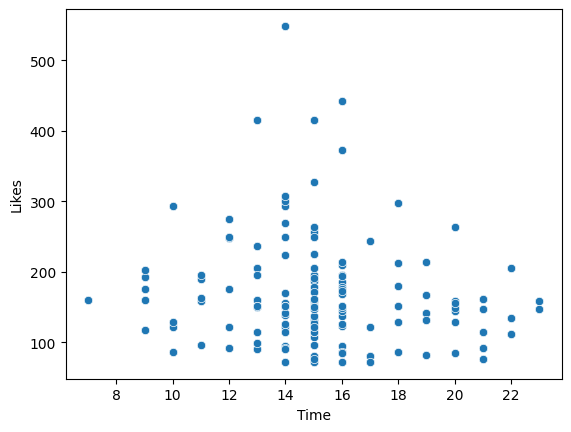

In [ ]:
sns.scatterplot(x=insta['Time'],y=insta['Likes'])

In [ ]:
insta.columns

Index(['Caption length', 'Hashtag count', 'Time', 'Likes', 'Comments',
       'Filter'],
      dtype='object')

In [ ]:
insta.isnull().sum()

,0
Caption length,0
Hashtag count,0
Time,0
Likes,0
Comments,0
Filter,0


In [ ]:
insta['Filter']=insta['Filter'].astype('category')
insta['Filter']=insta['Filter'].cat.codes

In [ ]:
insta

,Caption length,Hashtag count,Time,Likes,Comments,Filter
0,49,0,21,166,15,1
1,382,11,14,224,12,2
2,377,23,15,131,3,3
3,512,5,16,213,2,4
4,45,4,16,123,25,0
...,...,...,...,...,...,...
1038,551,8,14,152,11,2
1039,307,14,13,196,11,3
1040,994,12,10,86,11,4
1041,1001,9,16,85,8,0


In [ ]:
insta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Caption length  1043 non-null   int64
 1   Hashtag count   1043 non-null   int64
 2   Time            1043 non-null   int64
 3   Likes           1043 non-null   int64
 4   Comments        1043 non-null   int64
 5   Filter          1043 non-null   int8 
dtypes: int64(5), int8(1)
memory usage: 41.9 KB


In [ ]:
x=insta[['Caption length','Hashtag count','Time','Filter']]
y=insta[['Likes','Comments']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
prediction = model.predict(x_test)

In [ ]:
prediction

array([[151.49263557,  13.72496576],
       [172.86095007,  16.54612257],
       [180.16410636,  16.07779381],
       [152.88297679,  10.00432555],
       [184.35694817,  16.99791127],
       [180.16410636,  16.07779381],
       [176.2510308 ,  17.57065633],
       [190.45804575,  16.92329687],
       [186.01641484,  15.01441882],
       [180.17356573,  16.81840139],
       [168.02133629,  17.31867982],
       [160.34919073,  17.07722741],
       [166.10702663,  18.30269295],
       [183.17718904,  16.95602177],
       [171.11662755,  17.00001096],
       [170.57345148,  18.49381866],
       [191.54434446,  14.53158864],
       [172.77995272,  16.20494048],
       [175.16431613,  18.25891072],
       [150.72926003,  15.74456637],
       [182.39421791,  16.41978942],
       [182.39421791,  16.41978942],
       [150.42010998,  14.22038588],
       [172.79891256,  15.76689452],
       [174.23147443,  17.71076518],
       [175.62772967,  15.76323839],
       [187.05517715,  17.31724711],
 

In [ ]:
newdata=[[49,0,21,1]]

In [ ]:
predict_new=model.predict(newdata)
print("The Predicted Likes and Comments" , predict_new)

The Predicted Likes and Comments [[166.36478217  15.43962686]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
